In [143]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

In [144]:
df = pd.read_csv("products_asos.csv")

In [147]:
df.shape

(30844, 9)

In [146]:
len(df['sku'].unique())

df = df.drop(index=157).reset_index(drop=True)


In [148]:
df = df.drop(columns=['url']).drop_duplicates().reset_index(drop=True)

In [149]:
df.columns

Index(['name', 'size', 'category', 'price', 'color', 'sku', 'description',
       'images'],
      dtype='object')

In [150]:
duplicates = df.duplicated(keep=False)

# See how many duplicates exist
print("Number of duplicate rows (excluding URL):", duplicates.sum())

# Optionally, view the duplicate rows
#print(df[duplicates])

Number of duplicate rows (excluding URL): 0


In [151]:
df.head(11)

,name,size,category,price,color,sku,description,images
0,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stock,UK 16,UK 18",New Look trench coat in camel,49.99,Neutral,126704571.0,"[{'Product Details': 'Coats & Jackets by New LookLow-key layeringNotch collarButton placketTie waistRegular fitProduct Code: 126704571'}, {'Brand': 'Since setting up shop in the 60s, New Look has become a high-street classic known for creating universally loved, wardrobe-ready collections. Shop the New Look at ASOS edit, featuring everything from chic LBDs and printed dresses to all-important accessories and figure-flattering jeans (if you re anything like us, you re always on the hunt for those). While you re there, check out the label s cute-yet-classy tops and blouses for your next jeans and a nice top day.'}, {'Size & Fit': ""Model wears: UK 8/ EU 36/ US 4Model's height: 170 cm/5'7 ""}, {'Look After Me': 'Machine wash according to instructions on care label'}, {'About Me': 'Stretch, plain-woven fabricMain: 55% Polyester, 45% Elastomultiester.'}]","['https://images.asos-media.com/products/new-look-trench-coat-in-camel/204351106-4?$n_1920w$&wid=1926&fit=constrain', 'https://images.asos-media.com/products/new-look-trench-coat-in-camel/204351106-1-neutral?$n_1920w$&wid=1926&fit=constrain', 'https://images.asos-media.com/products/new-look-trench-coat-in-camel/204351106-2?$n_1920w$&wid=1926&fit=constrain', 'https://images.asos-media.com/products/new-look-trench-coat-in-camel/204351106-3?$n_1920w$&wid=1926&fit=constrain', 'https://images.asos-media.com/products/new-look-trench-coat-in-camel/204351106-4?$n_1920w$&wid=1926&fit=constrain']"
1,Stradivarius double breasted wool coat in grey,"XS - UK 6,S - UK 8,M - UK 10,L - UK 12,XL - UK 14",Stradivarius double breasted wool coat in grey,59.99,GREY,123650194.0,"[{'Product Details': 'Coats & Jackets by StradivariusJacket upgrade: checkNotch collarSingle-button fasteningSide pocketsRegular fitProduct Code: 123650194'}, {'Brand': 'Barcelona-born clothing brand Stradivarius moves to its own beat. With an eye for minimalism and trend-led detail, expect classic silhouettes and a neutral colour palette (with the odd print thrown in for good measure). The perfect stop for a wardrobe refresh, our Stradivarius at ASOS edit has everything from floaty day dresses and blouses to staple jeans and T-shirts. Looking for layers? Check out the brand s jumpers, jackets and blazers.'}, {'Size & Fit': 'Model wears: UK S/ EU S/ US XSModel\'s height: 168cm/5\'6""'}, {'Look After Me': 'Machine wash according to instructions on care label'}, {'About Me': 'Wool-mix fabricLining: 100% Polyester, Main: 53% Polyester, 30% Wool, 9% Acrylic, 8% Other fibres.'}]","['https://images.asos-media.com/products/stradivarius-double-breasted-wool-coat-in-grey/203958042-4?$n_1920w$&wid=1926&fit=constrain', 'https://images.asos-media.com/products/stradivarius-double-breasted-wool-coat-in-grey/203958042-1-grey?$n_1920w$&wid=1926&fit=constrain', 'https://images.asos-media.com/products/stradivarius-double-breasted-wool-coat-in-grey/203958042-2?$n_1920w$&wid=1926&fit=constrain', 'https://images.asos-media.com/products/stradivarius-double-breasted-wool-coat-in-grey/203958042-3?$n_1920w$&wid=1926&fit=constrain', 'https://images.asos-media.com/products/stradivarius-double-breasted-wool-coat-in-grey/203958042-4?$n_1920w$&wid=1926&fit=constrain']"
2,JDY oversized trench coat in stone,"3XL - UK 18 - Out of stock,XS - UK 6,S - UK 8,M - UK 10,L - UK 12,XL - UK 14,2XL - UK 16 - Out of stock",JDY oversized trench coat in stone,45.00,STONE,125806824.0,"[{'Product Details': 'Coats & Jackets by JDYLow-key layeringNotch collarButton placketBelted waistSide pocketsOversized fitProduct Code: 125806824'}, {'Brand': 'JDY collection here at ASOS is a bit of us, and we think it ll be a bit of you, too. Mix and match its dreamy denim skirts and jeans with trusty jersey pieces, or snap up an entire look in a striped or polka-dot co-ord. Its ditsy-pri

In [116]:
i = 1239

print(df['name'].iloc[i])
df['images'].iloc[i]

Barney's Originals Petite Clara real leather jacket


"['https://images.asos-media.com/products/barneys-originals-petite-clara-real-leather-jacket/202522725-4?$n_1920w$&wid=1926&fit=constrain', 'https://images.asos-media.com/products/barneys-originals-petite-clara-real-leather-jacket/202522725-1-black?$n_1920w$&wid=1926&fit=constrain', 'https://images.asos-media.com/products/barneys-originals-petite-clara-real-leather-jacket/202522725-2?$n_1920w$&wid=1926&fit=constrain', 'https://images.asos-media.com/products/barneys-originals-petite-clara-real-leather-jacket/202522725-3?$n_1920w$&wid=1926&fit=constrain', 'https://images.asos-media.com/products/barneys-originals-petite-clara-real-leather-jacket/202522725-4?$n_1920w$&wid=1926&fit=constrain']"

In [117]:
import ast

def get_first_image(entry):
    try:
        # 1. Convert string "['url1', 'url2']" -> list ['url1', 'url2']
        if isinstance(entry, str):
            entry = ast.literal_eval(entry)
            
        # 2. Get the first item from the list
        if isinstance(entry, list) and len(entry) > 0:
            return entry[0]
            
    except (ValueError, SyntaxError):
        return None
    return None

# Apply the fix
df['images'] = df['images'].apply(get_first_image)

# Verify: You should now see full URLs, not brackets
print(df['images'].head())

0    https://images.asos-media.com/products/new-loo...
1    https://images.asos-media.com/products/stradiv...
2    https://images.asos-media.com/products/jdy-ove...
3    https://images.asos-media.com/products/nike-ru...
4    https://images.asos-media.com/products/asos-de...
Name: images, dtype: object


In [20]:
df = pd.read_csv("asos_cleaned.csv")

i = 0

df.iloc[(i*5):((i+1)*5)]

,name,size,category,price,color,sku,description,images
0,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stock,UK 16,UK 18",New Look trench coat in camel,49.99,neutral,126704571,"[{'Product Details': 'Coats & Jackets by New LookLow-key layeringNotch collarButton placketTie waistRegular fitProduct Code: 126704571'}, {'Brand': 'Since setting up shop in the 60s, New Look has become a high-street classic known for creating universally loved, wardrobe-ready collections. Shop the New Look at ASOS edit, featuring everything from chic LBDs and printed dresses to all-important accessories and figure-flattering jeans (if you re anything like us, you re always on the hunt for those). While you re there, check out the label s cute-yet-classy tops and blouses for your next jeans and a nice top day.'}, {'Size & Fit': ""Model wears: UK 8/ EU 36/ US 4Model's height: 170 cm/5'7 ""}, {'Look After Me': 'Machine wash according to instructions on care label'}, {'About Me': 'Stretch, plain-woven fabricMain: 55% Polyester, 45% Elastomultiester.'}]",https://images.asos-media.com/products/new-look-trench-coat-in-camel/204351106-4?$n_1920w$&wid=1926&fit=constrain
1,Stradivarius double breasted wool coat in grey,"XS - UK 6,S - UK 8,M - UK 10,L - UK 12,XL - UK 14",Stradivarius double breasted wool coat in grey,59.99,grey,123650194,"[{'Product Details': 'Coats & Jackets by StradivariusJacket upgrade: checkNotch collarSingle-button fasteningSide pocketsRegular fitProduct Code: 123650194'}, {'Brand': 'Barcelona-born clothing brand Stradivarius moves to its own beat. With an eye for minimalism and trend-led detail, expect classic silhouettes and a neutral colour palette (with the odd print thrown in for good measure). The perfect stop for a wardrobe refresh, our Stradivarius at ASOS edit has everything from floaty day dresses and blouses to staple jeans and T-shirts. Looking for layers? Check out the brand s jumpers, jackets and blazers.'}, {'Size & Fit': 'Model wears: UK S/ EU S/ US XSModel\'s height: 168cm/5\'6""'}, {'Look After Me': 'Machine wash according to instructions on care label'}, {'About Me': 'Wool-mix fabricLining: 100% Polyester, Main: 53% Polyester, 30% Wool, 9% Acrylic, 8% Other fibres.'}]",https://images.asos-media.com/products/stradivarius-double-breasted-wool-coat-in-grey/203958042-4?$n_1920w$&wid=1926&fit=constrain
2,JDY oversized trench coat in stone,"3XL - UK 18 - Out of stock,XS - UK 6,S - UK 8,M - UK 10,L - UK 12,XL - UK 14,2XL - UK 16 - Out of stock",JDY oversized trench coat in stone,45.00,stone,125806824,"[{'Product Details': 'Coats & Jackets by JDYLow-key layeringNotch collarButton placketBelted waistSide pocketsOversized fitProduct Code: 125806824'}, {'Brand': 'JDY collection here at ASOS is a bit of us, and we think it ll be a bit of you, too. Mix and match its dreamy denim skirts and jeans with trusty jersey pieces, or snap up an entire look in a striped or polka-dot co-ord. Its ditsy-print dresses are just the right amount of kitsch, too.'}, {'Size & Fit': 'Model\'s height: 167.5cm/5\'6""Model is wearing: UK S/ EU S/ US XS'}, {'Look After Me': 'Machine wash according to instructions on care label'}, {'About Me': 'Plain-woven fabricMain: 90% Polyester, 10% Nylon.'}]",https://images.asos-media.com/products/jdy-oversized-trench-coat-in-stone/204198578-4?$n_1920w$&wid=1926&fit=constrain
3,Nike Running hooded jacket in pink,"XS - UK 4-6,S - UK 8-10,M - UK 12-14,L - UK 16-18,XL - UK 20-22",Nike Running hooded jacket in pink,84.95,pink,121963507,"[{'Product Details': 'Coats & Jackets by Nike RunningHit that new PBToggle hoodZip fasteningNike logo print to chestZip side pocketsReflective details for increased visibility in low lightingElasticated cuffsRegular fitProduct Code: 121963507'}, {'Brand': 'Key players in everything activewear-related, it doesn t get more iconic than Nike. Sporting some of the most wanted trainers in the game, browse Air Max 90s and Air Force 1s, as well as Cortez and Joyride styles. 

In [27]:
df['description'][:5]

0                                            [{'Product Details': 'Coats & Jackets by New LookLow-key layeringNotch collarButton placketTie waistRegular fitProduct Code: 126704571'}, {'Brand': 'Since setting up shop in the 60s, New Look has become a high-street classic known for creating universally loved, wardrobe-ready collections. Shop the New Look at ASOS edit, featuring everything from chic LBDs and printed dresses to all-important accessories and figure-flattering jeans (if you re anything like us, you re always on the hunt for those). While you re there, check out the label s cute-yet-classy tops and blouses for your next  jeans and a nice top  day.'}, {'Size & Fit': "Model wears: UK 8/ EU 36/ US 4Model's height:  170 cm/5'7 "}, {'Look After Me': 'Machine wash according to instructions on care label'}, {'About Me': 'Stretch, plain-woven fabricMain: 55% Polyester, 45% Elastomultiester.'}]
1                     [{'Product Details': 'Coats & Jackets by StradivariusJacket upgrade: c

In [3]:
df.columns

Index(['name', 'size', 'category', 'price', 'color', 'sku', 'description',
       'images'],
      dtype='object')

In [23]:
import pandas as pd
import ast
import re

def extract_features_v2(description_str):
    data = {
        'brand': None,
        'category': None,
        'main_material': None,
        'fit_type': None
    }
    
    if not isinstance(description_str, str):
        return pd.Series(data)

    try:
        desc_list = ast.literal_eval(description_str)
        
        # Helper to safely get key values
        def get_val(key_name):
            return next((item[key_name] for item in desc_list if key_name in item), '')

        # --- 1. Brand & Category Extraction ---
        prod_details = get_val('Product Details')
        if prod_details:
            parts = prod_details.split(' by ', 1)
            if len(parts) == 2:
                data['category'] = parts[0].strip() # e.g., "Coats & Jackets"
                
                rest = parts[1] # e.g., "New LookLow-key layering..." or "JDYLow-key..."
                
                # REVISED REGEX EXPLANATION:
                # We split on two specific boundaries:
                # 1. (?<=[a-z])(?=[A-Z])  -> Lowercase followed by Uppercase (e.g., "Look"|"Low")
                # 2. (?<=[A-Z])(?=[A-Z][a-z]) -> Uppercase followed by Title Case (e.g., "JDY"|"Low")
                # We use re.split with maxsplit=1 to only break the FIRST time this happens.
                
                split_parts = re.split(r'(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])', rest, maxsplit=1)
                
                if len(split_parts) > 0:
                    data['brand'] = split_parts[0].strip()

            # --- 2. Fit Type Extraction ---
            prods_lower = prod_details.lower()
            if 'oversized' in prods_lower:
                data['fit_type'] = 'Oversized'
            elif 'regular' in prods_lower:
                data['fit_type'] = 'Regular'
            elif 'slim' in prods_lower:
                data['fit_type'] = 'Slim'
            elif 'tall' in prods_lower: # Added based on your data
                data['fit_type'] = 'Tall'
        
        # --- 3. Material Extraction (Fixed) ---
        about_me = get_val('About Me')
        if about_me:
            # Fix: Only look at text AFTER "Main:" to avoid picking up Lining/Rib percentages
            if "Main:" in about_me:
                main_text = about_me.split("Main:", 1)[1]
            else:
                main_text = about_me

            # Extract percentages and material names
            materials = re.findall(r"(\d+)%\s+([A-Za-z]+)", main_text)
            
            if materials:
                # Sort by percentage (highest first)
                materials.sort(key=lambda x: int(x[0]), reverse=True)
                data['main_material'] = materials[0][1]

        return pd.Series(data)

    except Exception as e:
        return pd.Series(data)

In [25]:
import pandas as pd
import ast
import re

def extract_features(description_str):
    """
    Parses the 'description' column to extract structured features.
    
    Logic:
    1. Parses stringified JSON.
    2. Splits 'Product Details' to separate Category and Brand/Description.
    3. Uses Regex look-behinds to split concatenated Brand/Description strings.
    4. Extracts Fit Type based on keywords.
    5. Extracts Main Material by parsing percentages in 'About Me'.
    """
    # Initialize dictionary with None to ensure consistent columns even on failure
    data = {
        'brand': None,
        'item_category': None,
        'main_material': None,
        'fit_type': None
    }
    
    # Handle NaN or non-string inputs
    if not isinstance(description_str, str):
        return pd.Series(data)

    try:
        # Safely evaluate string literal to list
        desc_list = ast.literal_eval(description_str)
        
        # Helper to retrieve values from the list of dicts
        def get_val(key_name):
            return next((item[key_name] for item in desc_list if key_name in item), '')

        # --- Extraction 1: Brand & Category ---
        prod_details = get_val('Product Details')
        if prod_details:
            # Pattern: "Category by BrandDescription..."
            parts = prod_details.split(' by ', 1)
            
            if len(parts) == 2:
                data['item_category'] = parts[0].strip()
                rest = parts[1]
                
                # Regex Explanation:
                # 1. (?<=[a-z])(?=[A-Z]) matches boundary between lowercase and Uppercase (e.g., "Look"|"Low")
                # 2. (?<=[A-Z])(?=[A-Z][a-z]) matches boundary between Uppercase and Titlecase (e.g., "JDY"|"Low")
                split_parts = re.split(r'(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])', rest, maxsplit=1)
                
                if len(split_parts) > 0:
                    data['brand'] = split_parts[0].strip()

            # --- Extraction 2: Fit Type ---
            # Check for fit keywords in Product Details
            prods_lower = prod_details.lower()
            if 'oversized' in prods_lower:
                data['fit_type'] = 'Oversized'
            elif 'regular' in prods_lower:
                data['fit_type'] = 'Regular'
            elif 'slim' in prods_lower:
                data['fit_type'] = 'Slim'
            elif 'tall' in prods_lower:
                data['fit_type'] = 'Tall'
            elif 'petite' in prods_lower:
                data['fit_type'] = 'Petite'
        
        # --- Extraction 3: Material ---
        about_me = get_val('About Me')
        if about_me:
            # Isolate the 'Main' fabric section if it exists to avoid Lining/Rib percentages
            if "Main:" in about_me:
                main_text = about_me.split("Main:", 1)[1]
            else:
                main_text = about_me

            # Regex: Capture digits followed by % followed by the material name
            materials = re.findall(r"(\d+)%\s+([A-Za-z]+)", main_text)
            
            if materials:
                # Sort by percentage descending (int conversion required for sorting)
                materials.sort(key=lambda x: int(x[0]), reverse=True)
                data['main_material'] = materials[0][1]

        return pd.Series(data)

    except (ValueError, SyntaxError):
        # Return empty series on parsing failure
        return pd.Series(data)

# Apply the function to the description column
new_features = df['description'].apply(extract_features)

# Concatenate the new features with the original dataframe
df_final = pd.concat([df, new_features], axis=1)

# Display the first 5 rows of the new relevant columns
print(df_final[['brand', 'item_category', 'main_material', 'fit_type']].head())

          brand    item_category main_material   fit_type
0      New Look  Coats & Jackets     Polyester    Regular
1  Stradivarius  Coats & Jackets     Polyester    Regular
2           JDY  Coats & Jackets     Polyester  Oversized
3  Nike Running  Coats & Jackets     Polyester    Regular
4     ASOS Tall  Coats & Jackets        Cotton    Regular


In [29]:
df_final.drop(['category', 'size'], axis=1, inplace=True)

In [65]:
df_final.drop(['name'], axis=1, inplace=True)

In [69]:
df_final.head()

,price,sku,description,images,brand,item_category,main_material,fit_type,color_simple
0,49.99,126704571,Coats & Jackets by New Look Low-key layering Notch collar Button placket Tie waist,https://images.asos-media.com/products/new-look-trench-coat-in-camel/204351106-4?$n_1920w$&wid=1926&fit=constrain,New Look,Coats & Jackets,Polyester,Regular,Beige
1,59.99,123650194,Coats & Jackets by Stradivarius Jacket upgrade: check Notch collar Single-button fastening Side pockets,https://images.asos-media.com/products/stradivarius-double-breasted-wool-coat-in-grey/203958042-4?$n_1920w$&wid=1926&fit=constrain,Stradivarius,Coats & Jackets,Polyester,Regular,Grey
2,45.00,125806824,Coats & Jackets by JDY Low-key layering Notch collar Button placket Belted waist Side pockets,https://images.asos-media.com/products/jdy-oversized-trench-coat-in-stone/204198578-4?$n_1920w$&wid=1926&fit=constrain,JDY,Coats & Jackets,Polyester,Oversized,Beige
3,84.95,121963507,Coats & Jackets by Nike Running Hit that new PB Toggle hood Zip fastening Nike logo print to chest Zip side pockets Reflective details for increased visibility in low lighting Elasticated cuffs,https://images.asos-media.com/products/nike-running-hooded-jacket-in-pink/203658411-4?$n_1920w$&wid=1926&fit=constrain,Nike Running,Coats & Jackets,Polyester,Regular,Black
4,75.00,123053365,Coats & Jackets by ASOS Tall Throw-on appeal Notch collar Button placket Tie waist Side pockets,https://images.asos-media.com/products/asos-design-tall-linen-mix-trench-coat-in-natural/203826416-4?$n_1920w$&wid=1926&fit=constrain,ASOS Tall,Coats & Jackets,Cotton,Regular,Beige


In [38]:
import ast
import json

# Select the first row of the description column for inspection
raw_string = df['description'].iloc[200]

# Convert the stringified list representation into a Python list of dictionaries
parsed_data = ast.literal_eval(raw_string)

# Print the data structure formatted with indentation for readability
print(json.dumps(parsed_data, indent=4))

[
    {
        "Product Details": "Coats & Jackets by adidas OriginalsLow-key layeringadidas branded designHigh collarPartial zip fasteningElasticated cuffs and hemRegular fitProduct Code: 119521923"
    },
    {
        "Brand": "With a history stretching back over 60 years, adidas Originals staples have become key players in wardrobes everywhere. Scroll the adidas Originals at ASOS edit to get your 3-Stripes fix, with everything from adidas Performance leggings and vests to adidas Originals tracksuits, joggers, T-shirts and sweatshirts for that classic streetwear style. Just here for the brand s iconic trainers? Check out effortless, everyday kicks from the brand s Superstar, Stan Smith, Gazelle and Continental 80 collections."
    },
    {
        "Size & Fit": "Model wears: UK 8/ EU 36/ US 4Model's height: 170.5cm/5'7\""
    },
    {
        "Look After Me": "Machine wash according to instructions on care label"
    },
    {
        "About Me": "Faux fur: super-soft synthetic fabr

In [39]:
import ast
import pandas as pd

def extract_details_text(description_str):
    """
    Parses a stringified JSON list to return only the 'Product Details' value.
    
    Args:
        description_str (str): String representation of list of dicts.
        
    Returns:
        str or None: The text content of 'Product Details' or None if missing/invalid.
    """
    if not isinstance(description_str, str):
        return None

    try:
        # Convert string literal to Python object
        desc_list = ast.literal_eval(description_str)
        
        # Iterate through the list to find the dictionary with the specific key
        # Returns the value immediately upon finding the key
        for item in desc_list:
            if 'Product Details' in item:
                return item['Product Details']
        
        return None

    except (ValueError, SyntaxError):
        # Handle malformed strings
        return None

# Apply the extraction function to the description column
# This overwrites the original complex column with just the simple text string
df_final['description'] = df_final['description'].apply(extract_details_text)

# Verify the transformation by displaying the first few rows
print(df_final['description'].head())

0                                                                                                                Coats & Jackets by New LookLow-key layeringNotch collarButton placketTie waistRegular fitProduct Code: 126704571
1                                                                                           Coats & Jackets by StradivariusJacket upgrade: checkNotch collarSingle-button fasteningSide pocketsRegular fitProduct Code: 123650194
2                                                                                                    Coats & Jackets by JDYLow-key layeringNotch collarButton placketBelted waistSide pocketsOversized fitProduct Code: 125806824
3    Coats & Jackets by Nike RunningHit that new PBToggle hoodZip fasteningNike logo print to chestZip side pocketsReflective details for increased visibility in low lightingElasticated cuffsRegular fitProduct Code: 121963507
4                                                                                               

In [41]:
import re
import pandas as pd

def clean_description_text(text):
    """
    Cleans the description string by inserting missing spaces and removing 
    metadata like Product Codes.
    
    Operations:
    1. Inserts space between Lowercase-Uppercase boundary (e.g., "layeringNotch" -> "layering Notch").
    2. Inserts space between Uppercase-Titlecase boundary (e.g., "JDYLow" -> "JDY Low").
    3. Removes 'Product Code: [digits]' sequence.
    
    Args:
        text (str): The raw description string.
        
    Returns:
        str: The cleaned and trimmed string.
    """
    if not isinstance(text, str):
        return text
        
    # 1. Split glued words
    # Pattern 1: (?<=[a-z])(?=[A-Z]) matches lowercase followed by Uppercase
    # Pattern 2: (?<=[A-Z])(?=[A-Z][a-z]) matches Uppercase followed by Uppercase+lowercase (Acronym boundary)
    split_pattern = r'(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])'
    text = re.sub(split_pattern, ' ', text)
    
    # 2. Remove Product Code
    # Matches "Product Code:" followed optionally by whitespace and then digits
    code_pattern = r'Product Code:\s*\d+'
    text = re.sub(code_pattern, '', text)
    
    return text.strip()

# Apply the cleaning logic to the description column in df_final
df_final['description'] = df_final['description'].apply(clean_description_text)

# Verify results
print(df_final['description'].head())

0                                                                                                                   Coats & Jackets by New Look Low-key layering Notch collar Button placket Tie waist Regular fit
1                                                                                              Coats & Jackets by Stradivarius Jacket upgrade: check Notch collar Single-button fastening Side pockets Regular fit
2                                                                                                      Coats & Jackets by JDY Low-key layering Notch collar Button placket Belted waist Side pockets Oversized fit
3    Coats & Jackets by Nike Running Hit that new PB Toggle hood Zip fastening Nike logo print to chest Zip side pockets Reflective details for increased visibility in low lighting Elasticated cuffs Regular fit
4                                                                                                      Coats & Jackets by ASOS Tall Throw-on appeal Notch co

In [44]:
def remove_trailing_fit_phrase(text):
    """
    Removes the last two words of the text if the very last word is 'fit'.
    Example: "... Tie waist Regular fit" -> " ... Tie waist"
    """
    if not isinstance(text, str):
        return text
    
    # Split text into a list of words
    words = text.strip().split()
    
    # Check if there are at least 2 words and the last one is 'fit' (case-insensitive)
    if len(words) >= 2 and words[-1].lower() == 'fit':
        # Join all words except the last two
        return ' '.join(words[:-2])
    
    return text

# Apply the function to df_final
df_final['description'] = df_final['description'].apply(remove_trailing_fit_phrase)

# Verify the output (Rows should no longer end in 'Regular fit' or 'Oversized fit')
print(df_final['description'].head())

0                                                                                                                   Coats & Jackets by New Look Low-key layering Notch collar Button placket Tie waist
1                                                                                              Coats & Jackets by Stradivarius Jacket upgrade: check Notch collar Single-button fastening Side pockets
2                                                                                                        Coats & Jackets by JDY Low-key layering Notch collar Button placket Belted waist Side pockets
3    Coats & Jackets by Nike Running Hit that new PB Toggle hood Zip fastening Nike logo print to chest Zip side pockets Reflective details for increased visibility in low lighting Elasticated cuffs
4                                                                                                      Coats & Jackets by ASOS Tall Throw-on appeal Notch collar Button placket Tie waist Side pockets
Name:

In [45]:
df_final['description'].iloc[200:205]

200                                                                                           Coats & Jackets by adidas Originals Low-key layeringadidas branded design High collar Partial zip fastening Elasticated cuffs and hem
201    Coats & Jackets by ASOS 4505Mid-season layering Packable hood can be stowed inside collar High collar Partial zip fastening Toggle waist Storm shield to reverse Reflective details for increased visibility in low lighting
202                                                                                               Coats & Jackets by Barbour Exclusive collaboration with ASOS Branded design Toggle hood Zip and press-stud fastening Side pockets
203                                                                                                           Coats & Jackets by Noisy May Mid-season layering Check design Spread collar Button placket Chest pockets Long sleeves
204                                                                                     

In [ ]:
import pandas as pd

def simplify_color_final(color_str):
    """
    Maps detailed fashion colors to broad buckets, including extensive pattern handling.
    """
    if not isinstance(color_str, str):
        return 'Other'
    
    # Normalize input
    c = color_str.lower().strip()
    
    # 1. Pattern/Multi Check (Prioritize this to catch 'Blue Floral' as Multi)
    # Added: leopard, zebra, animal, camo, floral, dot, spot, check, gingham, abstract, mono, jacquard
    pattern_keywords = [
        'multi', 'print', 'contrast', 'check', 'stripe', 'tie dye', 'ombre',
        'leopard', 'zebra', 'animal', 'camo', 'camouflage',
        'floral', 'flower', 'ditsy', 'meadow', 'garden',
        'dot', 'spot', 'gingham', 'abstract', 'mono', 'jacquard', 'tonal'
    ]
    if any(keyword in c for keyword in pattern_keywords):
        return 'Multi/Pattern'

    # 2. Solid Color Mapping
    color_map = {
        'Black': ['black', 'charcoal', 'anthracite', 'noir', 'ink', 'onyx', 'caviar', 'obsidian', 'jet'],
        'White': ['white', 'ivory', 'cream', 'ecru', 'chalk', 'snow', 'off-white', 'bleach'],
        'Grey': ['grey', 'gray', 'silver', 'slate', 'gunmetal', 'marl', 'cloud', 'pewter', 'dove'],
        'Beige': ['beige', 'stone', 'camel', 'tan', 'taupe', 'sand', 'nude', 'oatmeal', 'khaki', 
                  'mushroom', 'biscuit', 'natural', 'neutral', 'champagne', 'oyster', 'birch', 
                  'buttermilk', 'oat', 'latte', 'fossil', 'laurel', 'cork'],
        'Brown': ['brown', 'chocolate', 'coffee', 'rust', 'copper', 'bronze', 'mahogany', 'toffee', 
                  'cocoa', 'mocha', 'caramel', 'cinnamon', 'java', 'coconut'],
        'Red': ['red', 'burgundy', 'maroon', 'wine', 'cherry', 'berry', 'oxblood', 'brick', 'scarlet', 
                'burgandy', 'merlot'], # Added typo 'burgandy'
        'Pink': ['pink', 'rose', 'fuchsia', 'salmon', 'coral', 'blush', 'magenta', 'mauve', 'peach', 
                 'petal', 'fuschia', 'orchid'], # Added typo 'fuschia'
        'Orange': ['orange', 'burnt', 'ginger', 'terracotta', 'apricot', 'tangerine'],
        'Yellow': ['yellow', 'mustard', 'gold', 'lemon', 'ochre', 'amber', 'saffron', 'chartreuse'],
        'Green': ['green', 'emerald', 'olive', 'sage', 'mint', 'lime', 'teal', 'forest', 'jade', 
                  'khaki', 'aloe', 'pistachio'],
        'Blue': ['blue', 'navy', 'denim', 'indigo', 'cyan', 'cobalt', 'sky', 'azure', 'royal', 
                 'turquoise', 'petrol', 'aqua', 'midwash', 'eclipse'],
        'Purple': ['purple', 'lilac', 'lavender', 'violet', 'plum', 'aubergine', 'grape']
    }

    # Iterate through the map
    for broad_color, keywords in color_map.items():
        if any(keyword in c for keyword in keywords):
            return broad_color

    # 3. Fallback
    return 'Other'

# Apply the final function
df_final['color_simple'] = df_final['color'].apply(simplify_color_final)

# Display the final counts
print(df_final['color_simple'].value_counts())

color_simple
Black            9328
Multi/Pattern    4020
White            3259
Green            2612
Blue             2315
Beige            2198
Brown            1342
Grey             1084
Red              1004
Purple            892
Yellow            522
Orange            514
Other             454
Pink              427
Name: count, dtype: int64


In [ ]:
# # Save the cleaned DataFrame to a CSV file
# # index=False prevents writing the row numbers (0, 1, 2...) as a separate column
# df_final.to_csv('asos_final_clean.csv', index=False)

# print("File saved successfully.")

In [74]:
df_final['brand'].unique()

array(['New Look', 'Stradivarius', 'JDY', ...,
       'New Look Summer, styled Shirred, stretch bust',
       'Bershka For the rotation Studded notch lapels Zip fastening  Functional pockets',
       'South Beach Exclusive to ASOS High collar Partial zip fastening Long sleeves Elasticated hem'],
      shape=(4950,), dtype=object)

In [85]:
print(df_final['brand'].value_counts())

brand
ASOS DESIGN                 3993
Topshop                     1392
ASOS DESIGN Curve           1037
Miss Selfridge               581
River Island                 573
                            ... 
French Connection Estari       1
NA-KD X Dani Pavlica           1
Only Curve Sally               1
Dr Denim Plus Echo             1
COLLUSION Plus PU              1
Name: count, Length: 2493, dtype: int64


In [83]:
orig_brands = df['name']

df_final = pd.concat([orig_brands, df_final], axis=1)

df_final.head()

,name,price,sku,description,images,brand,item_category,main_material,fit_type,color_simple
0,New Look trench coat in camel,49.99,126704571,Coats & Jackets by New Look Low-key layering Notch collar Button placket Tie waist,https://images.asos-media.com/products/new-look-trench-coat-in-camel/204351106-4?$n_1920w$&wid=1926&fit=constrain,New Look,Coats & Jackets,Polyester,Regular,Beige
1,Stradivarius double breasted wool coat in grey,59.99,123650194,Coats & Jackets by Stradivarius Jacket upgrade: check Notch collar Single-button fastening Side pockets,https://images.asos-media.com/products/stradivarius-double-breasted-wool-coat-in-grey/203958042-4?$n_1920w$&wid=1926&fit=constrain,Stradivarius,Coats & Jackets,Polyester,Regular,Grey
2,JDY oversized trench coat in stone,45.00,125806824,Coats & Jackets by JDY Low-key layering Notch collar Button placket Belted waist Side pockets,https://images.asos-media.com/products/jdy-oversized-trench-coat-in-stone/204198578-4?$n_1920w$&wid=1926&fit=constrain,JDY,Coats & Jackets,Polyester,Oversized,Beige
3,Nike Running hooded jacket in pink,84.95,121963507,Coats & Jackets by Nike Running Hit that new PB Toggle hood Zip fastening Nike logo print to chest Zip side pockets Reflective details for increased visibility in low lighting Elasticated cuffs,https://images.asos-media.com/products/nike-running-hooded-jacket-in-pink/203658411-4?$n_1920w$&wid=1926&fit=constrain,Nike Running,Coats & Jackets,Polyester,Regular,Black
4,ASOS DESIGN Tall linen mix trench coat in natural,75.00,123053365,Coats & Jackets by ASOS Tall Throw-on appeal Notch collar Button placket Tie waist Side pockets,https://images.asos-media.com/products/asos-design-tall-linen-mix-trench-coat-in-natural/203826416-4?$n_1920w$&wid=1926&fit=constrain,ASOS Tall,Coats & Jackets,Cotton,Regular,Beige


In [84]:
import pandas as pd
import re

def extract_brand_from_name(name_str):
    """
    Extracts the brand from the start of the product name.
    
    Logic:
    Captures the sequence of words at the beginning of the string that start 
    with a Capital Letter or a Digit.
    
    Stops as soon as it hits a word starting with a lowercase letter.
    """
    if not isinstance(name_str, str):
        return None
        
    # Regex Explanation:
    # ^             : Start of string
    # [A-Z0-9]      : First char must be Uppercase or Digit (handles "4th & Reckless")
    # [\w&'.\-]* : Subsequent chars can be word chars, &, ', ., or - (handles "Pull&Bear", "Levi's")
    # (?: ... )* : Non-capturing group for subsequent words
    # \s+           : Space between words
    # [A-Z0-9]      : Next word must ALSO start with Uppercase/Digit
    pattern = r"^([A-Z0-9][\w&'.\-]*(?:\s+[A-Z0-9][\w&'.\-]*)*)"
    
    match = re.search(pattern, name_str)
    
    if match:
        return match.group(1).strip()
    return None

# Apply the function to the 'name' column
# We save this to a new column 'brand_name_extracted' to compare
df_final['brand'] = df_final['name'].apply(extract_brand_from_name)

# --- VALIDATION ---
# Let's see how this performed compared to our previous method
print("Top 10 Extracted Brands:")
print(df_final['brand'].value_counts().head(10))

print("\nSample of specific extractions:")
print(df_final[['name', 'brand']].head(10))

Top 10 Extracted Brands:
brand
ASOS DESIGN           3993
Topshop               1392
ASOS DESIGN Curve     1037
Miss Selfridge         581
River Island           573
Monki                  547
ASOS DESIGN Petite     498
ASOS DESIGN Tall       497
Bershka                466
New Look               427
Name: count, dtype: int64

Sample of specific extractions:
                                                           name  \
0                                 New Look trench coat in camel   
1                Stradivarius double breasted wool coat in grey   
2                            JDY oversized trench coat in stone   
3                            Nike Running hooded jacket in pink   
4             ASOS DESIGN Tall linen mix trench coat in natural   
5                              ASOS DESIGN denim bomber in ecru   
6         ASOS Weekend Collective nylon track jacket in neutral   
7  ASOS DESIGN Tall ultimate faux leather biker jacket in black   
8         Native Youth oversized twil

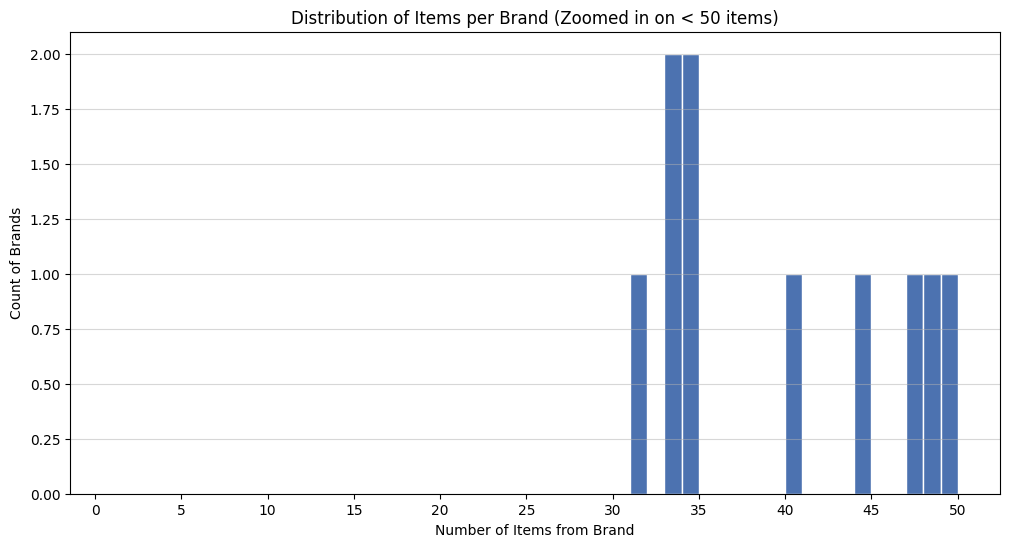

Total Brands: 56
Brands with 1 item: 0
Brands with <= 5 items: 0
Brands with <= 10 items: 0


In [152]:
import matplotlib.pyplot as plt

# 1. Get the counts
item_counts = df_final['item_category'].value_counts()

# 2. Setup the plot
plt.figure(figsize=(12, 6))

# We limit the range to 0-50 to "zoom in" on the low-frequency brands
# The bins=range(1, 51) creates a bar for exactly 1 item, 2 items, etc.
plt.hist(item_counts, bins=range(1, 51), color='#4c72b0', edgecolor='white')

# 3. Add lines and labels
plt.title('Distribution of Items per Brand (Zoomed in on < 50 items)')
plt.xlabel('Number of Items from Brand')
plt.ylabel('Count of Brands')
plt.xticks(range(0, 51, 5))  # Ticks every 5 units
plt.grid(axis='y', alpha=0.5)

# 4. Show plot
plt.show()

# --- DECISION STATS ---
# Calculate how many brands would be "Othered" at different thresholds
print(f"Total Brands: {len(item_counts)}")
print(f"Brands with 1 item: {sum(item_counts == 1)}")
print(f"Brands with <= 5 items: {sum(item_counts <= 5)}")
print(f"Brands with <= 10 items: {sum(item_counts <= 10)}")

In [96]:
import pandas as pd

# 1. Get the counts
brand_counts = df_final['brand'].value_counts()

# 2. Identify brands with exactly 1 count
one_hit_wonders = brand_counts[brand_counts == 1].index

# 3. Filter the main dataframe to show only these rows
# We display 'name' and 'brand' side-by-side to spot the extraction error
bad_brands_df = df_final[df_final['brand'].isin(one_hit_wonders)][['name', 'brand']]

# 4. Show a sample
print(f"Total 1-item brands: {len(bad_brands_df)}")
print("\n--- Inspection: Name vs Extracted Brand ---")
pd.set_option('display.max_colwidth', None) # Ensure we see the full text
print(bad_brands_df.head(20))

Total 1-item brands: 0

--- Inspection: Name vs Extracted Brand ---
Empty DataFrame
Columns: [name, brand]
Index: []


In [153]:
import pandas as pd

# 1. Setup: Identify the brands to fix and the brands to match against
brand_counts = df_final['brand'].value_counts()

# Brands we want to try and fix (appear exactly once)
brands_to_fix = set(brand_counts[brand_counts == 1].index)

# Brands that exist in the table (The "Target Dictionary")
# We convert to a set for O(1) lookup speed
existing_brands = set(df_final['brand'].unique())

def prune_brand_recursive(brand_name):
    """
    Iteratively removes the last word of a brand string.
    If the truncated string matches an existing brand in the dataset, returns that match.
    If it runs out of words without a match, returns 'Other'.
    """
    # If this isn't a 1-hit wonder, keep it as is
    if brand_name not in brands_to_fix:
        return brand_name
        
    words = brand_name.split()
    
    # Loop while we still have words to remove
    while len(words) > 1: # >1 ensures we don't check empty string yet
        # Remove the last word
        words.pop()
        candidate = " ".join(words)
        
        # Check if this shorter version exists in our table
        if candidate in existing_brands:
            return candidate
            
    # If we get here, no parent brand was found
    return 'Other'

# 2. Apply the recursive pruning
# We apply it to the whole column, but the function immediately returns 'original' 
# if the brand isn't in our 'brands_to_fix' set.
df_final['brand'] = df_final['brand'].apply(prune_brand_recursive)

# 3. Re-evaluate Results
new_counts = df_final['brand'].value_counts()
print(f"Reduction Report:")
print(f"Original unique brands: {len(brand_counts)}")
print(f"New unique brands: {len(new_counts)}")
print(f"Brands consolidated into 'Other': {new_counts.get('Other', 0)}")

# 4. Show examples of success (Brands that were rescued)
# We look for brands that WAS in 'brands_to_fix' but is NO LONGER in the dataset
rescued_brands = brands_to_fix - set(df_final['brand'].unique())
print(f"\nSuccessfully merged {len(rescued_brands)} 1-hit wonders.")

# Let's see the brands that now have increased counts (meaning they absorbed the orphans)
print("\nTop 10 Brands (post-merge):")
print(new_counts.head(10))

Reduction Report:
Original unique brands: 1172
New unique brands: 1172
Brands consolidated into 'Other': 186

Successfully merged 0 1-hit wonders.

Top 10 Brands (post-merge):
brand
ASOS DESIGN           4061
Topshop               1416
ASOS DESIGN Curve     1053
Miss Selfridge         593
River Island           578
Monki                  569
ASOS DESIGN Petite     504
ASOS DESIGN Tall       501
Bershka                467
New Look               431
Name: count, dtype: int64


In [111]:
import pandas as pd

# 1. Normalize casing: "coats & jackets" -> "Coats & Jackets"
# We convert to string first to handle any potential non-string objects safely
df_final['item_category'] = df_final['item_category'].astype(str).str.title()

# 2. Convert string 'Nan' or 'None' back to actual nulls if they were created by astype(str)
df_final['item_category'] = df_final['item_category'].replace({'Nan': None, 'None': None})

# 3. Check the new distribution
print("--- item_category (Normalized) ---")
print(df_final['item_category'].value_counts(dropna=False))

--- item_category (Normalized) ---
item_category
Dresses                      7287
Tops                         5238
Coats & Jackets              1752
Jumpers & Cardigans          1681
Lingerie & Nightwear          926
                             ... 
Fleece                          1
Swimsuit                        1
Plus-Size Fleece                1
Bikini Tops                     1
Plus-Size Leggings Shorts       1
Name: count, Length: 313, dtype: int64


In [112]:
import pandas as pd

# List of columns to inspect
columns_to_check = ['fit_type', 'main_material', 'item_category']

for col in columns_to_check:
    print(f"--- Distribution for {col} ---")
    # dropna=False ensures we see how many rows failed to extract a value (NaN)
    print(df_final[col].value_counts(dropna=False))
    print("\n")

--- Distribution for fit_type ---
fit_type
Regular      17318
None          6370
Slim          4033
Oversized     1798
Petite         252
Tall           200
Name: count, dtype: int64


--- Distribution for main_material ---
main_material
Polyester       15898
Cotton           7257
Viscose          2520
Acrylic          1414
Polyamide        1207
Nylon             558
Polyurethane      352
Lyocell           117
Wool               90
Other              89
Modal              88
Acetate            80
Linen              73
Recycled           72
Rayon              35
Real               30
Leather            27
Elastane           18
Cellulose          14
Tencel             11
Silicone           11
None               10
Name: count, dtype: int64


--- Distribution for item_category ---
item_category
Dresses                      7287
Tops                         5238
Coats & Jackets              1752
Jumpers & Cardigans          1681
Lingerie & Nightwear          926
                           

In [130]:
import pandas as pd

i = 11

# 1. Get the counts
category_counts = df_final['item_category'].value_counts()

# 2. Identify brands with exactly 1 count
cat_one_hit_wonders = category_counts[category_counts <= i].index

# 3. Filter the main dataframe to show only these rows
# We display 'name' and 'brand' side-by-side to spot the extraction error
bad_cats_df = df_final[df_final['item_category'].isin(cat_one_hit_wonders)][['item_category']]

# 4. Show a sample
print(f"Total {i}-item brands: {len(bad_cats_df)}")
print("\n--- Inspection: Name vs Extracted Brand ---")
pd.set_option('display.max_colwidth', None) # Ensure we see the full text
print(bad_cats_df.head(20))

Total 11-item brands: 195

--- Inspection: Name vs Extracted Brand ---
     item_category
161         Gilets
360         Gilets
443          Parka
477         Gilets
548         Gilets
662         Gilets
743         Gilets
923         Gilets
1173         Parka
1561         Parka
1669        Gilets
1708         Parka
1786        Gilets
2249     Waistcoat
2327         Parka
2368         Parka
2790         Parka
2834    Co-Ord Set
2847         Parka
2920         Parka


In [114]:
import pandas as pd

# 1. Setup: Identify categories to fix (1-item wonders) and valid targets
cat_counts = df_final['item_category'].value_counts()
cats_to_fix = set(cat_counts[cat_counts == 1].index)
existing_cats = set(df_final['item_category'].unique())

def prune_category_front_recursive(cat_name):
    """
    Iteratively removes the FIRST word of a category string.
    If the shortened string matches an existing category, returns that match.
    If no match is found after stripping, returns 'Other'.
    """
    # If it's not a rare category, keep it
    if cat_name not in cats_to_fix:
        return cat_name
    
    words = cat_name.split()
    
    # Loop while we still have more than 1 word (don't strip down to empty)
    while len(words) > 1:
        # Remove the FIRST word (pop index 0)
        words.pop(0)
        candidate = " ".join(words)
        
        # Check if this stripped version exists in our dataset
        if candidate in existing_cats:
            return candidate
            
    # If we run out of words and found no parent category
    return 'Other'

# 2. Apply the recursive front-pruning
df_final['item_category'] = df_final['item_category'].apply(prune_category_front_recursive)

# 3. Final Cleanup: Group any remaining rare categories into 'Other'
# (This handles items that didn't match anything, e.g., "Blouse And Saree Set" -> 'Other')
final_counts = df_final['item_category'].value_counts()
rare_cats_final = final_counts[final_counts <= 5].index # Threshold of 5 for safety
df_final.loc[df_final['item_category'].isin(rare_cats_final), 'item_category'] = 'Other'

# --- VERIFICATION ---
print(f"Reduction Report:")
print(f"Original unique categories: {len(cat_counts)}")
print(f"New unique categories: {df_final['item_category'].nunique()}")

print("\nTop 10 Consolidated Categories:")
print(df_final['item_category'].value_counts().head(10))

print("\nSample of categories that were likely merged (Checking specific examples):")
# We check if terms like 'Gilet' or 'Parka' now exist with higher counts
print(df_final['item_category'].value_counts().loc[lambda x: x.index.isin(['Gilet', 'Parka', 'Raincoat', 'Jacket'])])

Reduction Report:
Original unique categories: 312
New unique categories: 150

Top 10 Consolidated Categories:
item_category
Dresses                 7288
Tops                    5239
Coats & Jackets         1752
Jumpers & Cardigans     1681
Lingerie & Nightwear     926
Trousers & Leggings      745
Top                      697
Dress                    691
Mini Dress               644
Petite                   559
Name: count, dtype: int64

Sample of categories that were likely merged (Checking specific examples):
item_category
Jacket    500
Gilet      54
Parka       9
Name: count, dtype: int64


In [ ]:
import pandas as pd
import re

def force_remove_prefixes(cat_str):
    """
    Removes specific keywords from the start of the category string.
    Repeats until no prefixes remain (handles 'Maternity Tall...').
    """
    if not isinstance(cat_str, str):
        return cat_str
        
    # List of prefixes to remove
    # We include 'Plus-Size' and 'Plus Size' just in case
    prefixes = ['Petite', 'Tall', 'Plus-Size', 'Plus Size', 'Maternity', 'Ski', 'Curve']
    
    # Regex explanation:
    # ^       : Start of string
    # (...)   : Group of options joined by |
    # \s+     : Followed by whitespace
    pattern = r'^(' + '|'.join(map(re.escape, prefixes)) + r')\s+'
    
    cleaned = cat_str
    
    # Loop to handle stacked prefixes (e.g. "Petite Maternity Dress")
    while True:
        # flags=re.IGNORECASE ensures we catch 'petite' or 'Petite'
        new_val = re.sub(pattern, '', cleaned, flags=re.IGNORECASE)
        if new_val == cleaned:
            break
        cleaned = new_val
        
    return cleaned

# 1. Apply the forced removal
df_final['item_category'] = df_final['item_category'].apply(force_remove_prefixes)

# 2. Re-calculate value counts to see the impact
print("--- New Bottom 20 Categories ---")
print(df_final['item_category'].value_counts(dropna=False).tail(20))

# 3. Optional: Check specifically for the categories that were previously problematic
print("\n--- Check Specific Base Categories ---")
check_list = ['Shirt', 'Vest', 'Blouse', 'Top', 'Cardigan', 'Bra', 'Jumpsuit']
print(df_final['item_category'].value_counts().loc[lambda x: x.index.isin(check_list)])

--- New Bottom 20 Categories ---
item_category
Suits & Separates    10
Polo Top              9
Parka                 9
Gilets                9
Thongs                9
Shapewear             9
Tracksuit Set         9
Corset Tops           9
Legging Shorts        8
Bikini Top            7
Polo Shirts           7
Pyjama Bottoms        7
Sportswear            6
Waistcoat             6
Corset                6
Kimono                6
Suits                 6
Vest Multipack        6
Jumpsuit              6
None                  2
Name: count, dtype: int64

--- Check Specific Base Categories ---
item_category
Top         820
Vest        312
Cardigan    239
Shirt       211
Bra         122
Blouse      111
Jumpsuit      6
Name: count, dtype: int64


In [136]:
import pandas as pd
import numpy as np

# 1. Fix Missing/None values first
# Replace actual NaN/None objects
df_final['item_category'] = df_final['item_category'].fillna('Other')

# Replace string "None" or "Nan" if they exist
df_final['item_category'] = df_final['item_category'].replace({'None': 'Other', 'Nan': 'Other', 'nan': 'Other'})

# 2. Apply Thresholding (Group categories with <= 11 items)
cat_counts = df_final['item_category'].value_counts()
threshold = 30
rare_cats = cat_counts[cat_counts <= threshold].index

# Update rare categories to 'Other'
df_final.loc[df_final['item_category'].isin(rare_cats), 'item_category'] = 'Other'

# --- FINAL VERIFICATION ---
print(f"Final number of Item Categories: {df_final['item_category'].nunique()}")
print(f"Count of 'Other': {df_final['item_category'].value_counts()['Other']}")
print("\nTop 10 Categories:")
print(df_final['item_category'].value_counts().head(10))

Final number of Item Categories: 56
Count of 'Other': 859

Top 10 Categories:
item_category
Dresses                 7288
Tops                    5239
Coats & Jackets         1752
Jumpers & Cardigans     1681
Dress                   1418
Lingerie & Nightwear     926
Other                    859
Top                      820
Trousers & Leggings      745
Mini Dress               644
Name: count, dtype: int64
